In [204]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pandas as pd
import scipy
import sklearn
#import tensorflow as tf
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sys
from matplotlib import cm
from scipy import stats
from sklearn.grid_search import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [205]:
matplotlib inline #이 브라우저에서 그림하겠다. 

UsageError: unrecognized arguments: #이 브라우저에서 그림하겠다.


In [206]:
days = range(511, 516) # 수정가능한 부분

pieces = []
for day in days:
    path = 'Eventdata_%d.txt' % day
    frame = pd.read_csv(path)
    pieces.append(frame)
    
# Concatenate everything into a single DataFrame
df = pd.concat(pieces, ignore_index=True) #6개 데이터 이음

C:\Users\keti_demo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72,74,76,78,80,82,84,86,88,90,92,94,96,98,100,102,104,106,108,110,112,114,116,118,120,122,124,126,128,130,132,134,136,138,140,142,144) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [207]:
df_new = df[df['FacilID']=='SUTECH02']
df_new=df_new.dropna() #왜 temp나 TAG001은 없앴지?
#df_new

In [208]:
df_new['Parameter 1'][:1].to_string(index=False)

'L0003'

In [210]:
numbers= range(1,72)
new_columns=['Time','GatewayID','FacilID']
for number in numbers:
    Parameter = 'Parameter %d' % number
    new_columns.append(df_new[Parameter][:1].to_string(index=False))
    
#new_columns

In [213]:
df_newformat =DataFrame(columns=new_columns)
df_newformat.Time=df_new.Time
df_newformat.GatewayID=df_new.GatewayID
df_newformat.FacilID=df_new.FacilID

numbers2= range(1,72)
for number in numbers2:
    Value = 'Parameter %d Value' % number
    df_newformat.ix[:,number+2]=df_new[Value]
    
#df_newformat

C:\Users\keti_demo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [212]:
df_F = df_newformat.ix[:,'F0050']
df_newformat_ver1 = df_newformat.drop('F0050', axis=1)
#df_F

In [214]:
df_F[df_F==0]='Normal'
df_F[df_F!='Normal']='Fault'
#df_F

C:\Users\keti_demo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [215]:
df_F2=pd.get_dummies(df_F)
df_newformat_ver2 = pd.concat([df_newformat_ver1, df_F2], axis=1) #기존 데이터에다 맨끝에 붙임 Normal Fault
#df_newformat_ver2


In [217]:
df_newformat_ver3=df_newformat_ver2[df_newformat_ver2.L0031<=340]
df_newformat_ver3=df_newformat_ver3[df_newformat_ver3.L0031>=7]
df_newformat_ver3=df_newformat_ver3[df_newformat_ver3.L0032<=40]
df_newformat_ver3=df_newformat_ver3[df_newformat_ver3.L0032>=0]
df_newformat_ver3=df_newformat_ver3[df_newformat_ver3.L0033<=29]
df_newformat_ver3=df_newformat_ver3[df_newformat_ver3.L0033>=0]
df_newformat_ver3=df_newformat_ver3[df_newformat_ver3.L0058<=40]
df_newformat_ver3=df_newformat_ver3[df_newformat_ver3.L0058>=0]
df_newformat_ver3=df_newformat_ver3[df_newformat_ver3.L0061<=359]
df_newformat_ver3=df_newformat_ver3[df_newformat_ver3.L0061>=0]
df_newformat_ver3.dropna()

,Time,GatewayID,FacilID,L0003,L0007,D4000,D4001,P0000,P0001,P0002,...,D4576,D4577,D4578,D4579,D4580,D4581,D4582,D4583,Fault,Normal
3221,2016-05-11 18:01,GW01,SUTECH02,2747.0,4.0,100000.0,1.0,38594.0,206.0,0.0,...,265.0,305.0,150.0,320.0,340.0,150.0,340.0,300.0,0,1
3239,2016-05-11 18:01,GW01,SUTECH02,2747.0,4.0,100000.0,1.0,38594.0,206.0,0.0,...,265.0,305.0,150.0,320.0,340.0,150.0,340.0,300.0,0,1
3248,2016-05-11 18:01,GW01,SUTECH02,2747.0,4.0,100000.0,1.0,38594.0,206.0,0.0,...,265.0,305.0,150.0,320.0,340.0,150.0,340.0,300.0,0,1
3257,2016-05-11 18:02,GW01,SUTECH02,2747.0,4.0,100000.0,1.0,38594.0,206.0,0.0,...,265.0,305.0,150.0,320.0,340.0,150.0,340.0,300.0,0,1
3314,2016-05-11 18:07,GW01,SUTECH02,2747.0,4.0,100000.0,1.0,38466.0,66.0,0.0,...,265.0,305.0,150.0,320.0,340.0,150.0,340.0,300.0,1,0
3376,2016-05-11 18:10,GW01,SUTECH02,2747.0,4.0,100000.0,1.0,38466.0,66.0,0.0,...,265.0,305.0,150.0,320.0,340.0,150.0,340.0,300.0,1,0
3403,2016-05-11 18:10,GW01,SUTECH02,2747.0,4.0,100000.0,1.0,38466.0,66.0,0.0,...,265.0,305.0,150.0,320.0,340.0,150.0,340.0,300.0,1,0
3421,2016-05-11 18:11,GW01,SUTECH02,2747.0,4.0,100000.0,1.0,38466.0,66.0,0.0,...,265.0,305.0,150.0,320.0,340.0,150.0,340.0,300.0,1,0
3468,2016-05-11 18:11,GW01,SUTECH02,2747.0,4.0,100000.0,1.0,38466.0,66.0,0.0,...,265.0,305.0,150.0,320.0,340.0,150.0,340.0,300.0,1,0
3514,2016-05-11 18:13,GW01,SUTECH02,2747.0,4.0,100000.0,1.0,38466.0,66.0,0.0,...,265.0,305.0,150.0,320.0,340.0,150.0,340.0,300.0,1,0


In [203]:

# Edited by Kyung min Lee, https://github.com/kmlee408
# bit 타입의 데이터를 binary로 변경시 정보 손상이 유의한지 판단

df_newformat_ver3_1= df_newformat_ver3.reset_index() # 새 index 지정(그래프로 보기 위함)
length =len(df_newformat_ver3_1) 
df_columns = df_newformat_ver3_1.columns[8:44] # P로 시작하는 Feature들만 bit로 포맷 되었음

data=[]
for i in range(8,44):
    data.append(max(df_newformat_ver3_1.ix[0:length,i])-min(df_newformat_ver3_1.ix[0:length,i]))
    Max_min = pd.DataFrame(data, columns=['Max-min']) # 새로운 DataFrame 생성
    
Max_min = Max_min.transpose() # 행과 열 위치 변경
Max_min.columns = df_columns # columns 이름 다시 지정
#Max_min

C:\Users\keti_demo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


,P0000,P0001,P0002,P0003,P0004,P0005,P0006,P0007,P0009,P000A,...,P0043,P0044,P0045,P0046,P0047,P0048,P0049,P004A,P004B,P004C
Max-min,49158.0,222.0,1.0,4489.0,54208.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [201]:

#Binary로 변경된 columns만 추출
list_Binary = []

for i in df_columns:
    if Max_min.ix[0, i] > 0: # true로 바뀐 경우
        list_Binary.append(i) # 바뀐 columns만 저장


C:\Users\keti_demo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


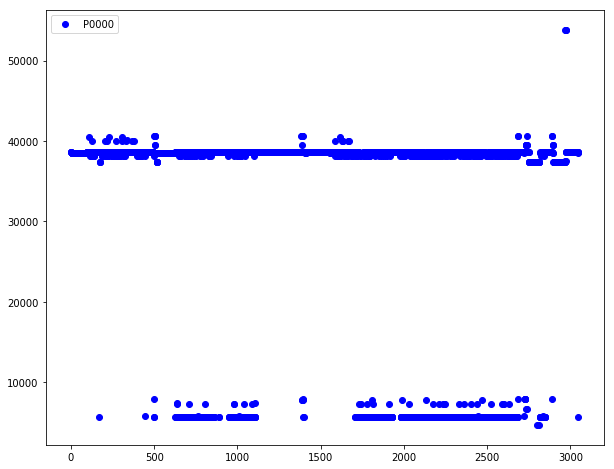

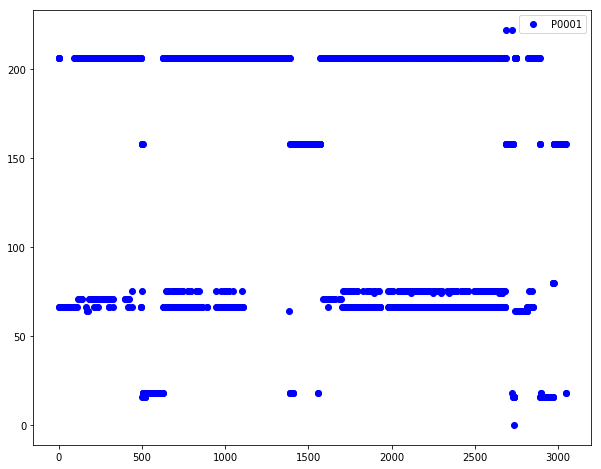

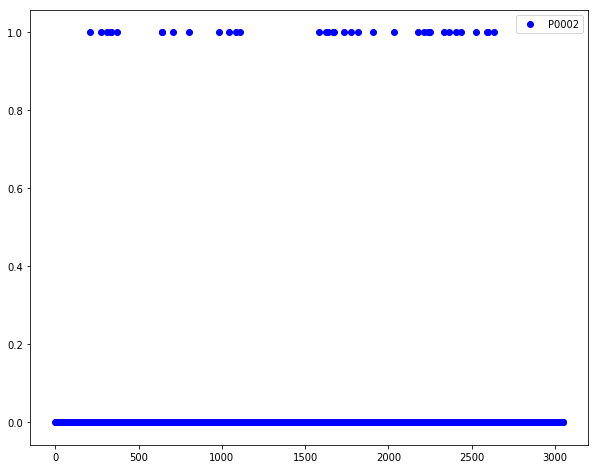

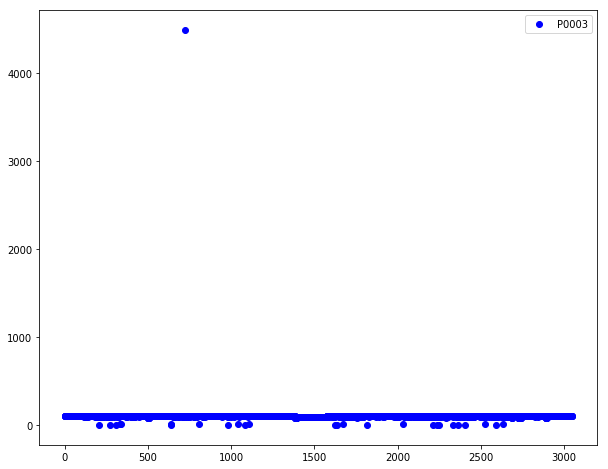

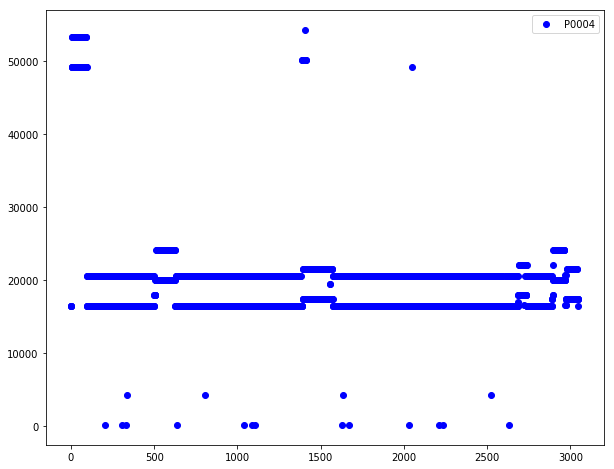

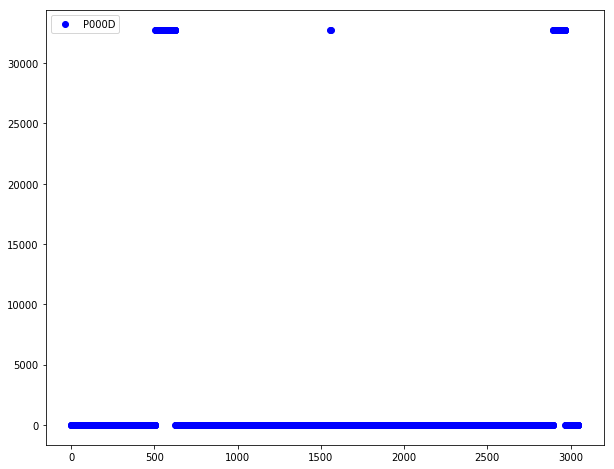

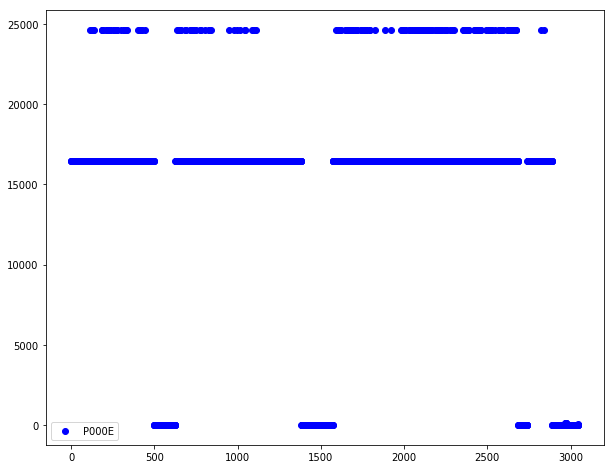

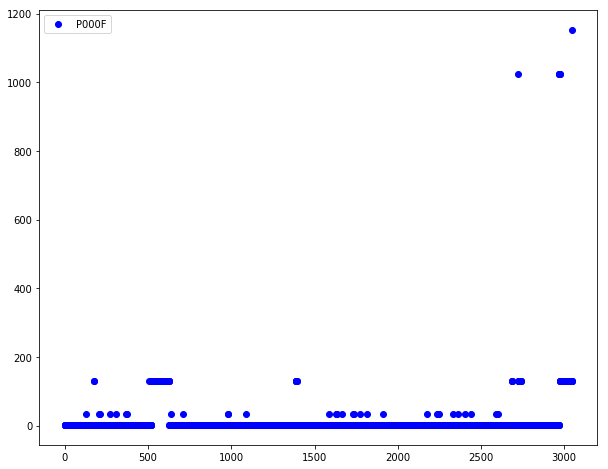

In [202]:
# 바뀐 columns 그래프로 확인
x= df_newformat_ver3_1.index
for i in list_Binary:
    plt.figure(figsize =(10,8)) # 그래프 사이즈
    y = df_newformat_ver3_1[i]    
    plt.scatter(x,y, color ='b', label = i)
    
    plt.legend()
    plt.show()